# K_mean algorithm

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [3]:
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

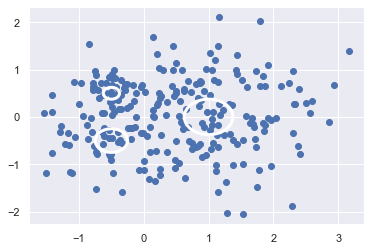

In [4]:
plt.scatter(points[:, 0], points[:, 1])
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=3))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=3))

In [5]:
#initializes k centroids by randomly selecting them from the data points.
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [6]:
initialize_centroids(points, 3)

array([[ 0.25879905, -0.39060746],
       [-0.11482363, -0.0033978 ],
       [-0.04551393, -0.33408668]])

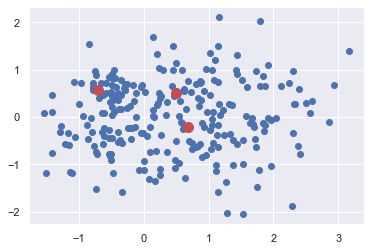

In [7]:
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

In [8]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [9]:
c = initialize_centroids(points, 3)
closest_centroid(points, c)

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2], dtype=int64)

In [10]:
c

array([[ 0.50370098,  1.14413436],
       [ 0.34438078,  0.04388922],
       [-0.39249042,  0.50157633]])

In [11]:
# extend an array by a new dimension
c_extended = c[: , np.newaxis, :]
c_extended

array([[[ 0.50370098,  1.14413436]],

       [[ 0.34438078,  0.04388922]],

       [[-0.39249042,  0.50157633]]])

In [12]:
c_extended.shape

(3, 1, 2)

In [13]:
p = points[0]
p

array([0.87490713, 0.71535456])

In [14]:
c_extended - p

array([[[-0.37120615,  0.4287798 ]],

       [[-0.53052634, -0.67146535]],

       [[-1.26739755, -0.21377823]]])

In [15]:
# the last step in the algorithm is to move the centroids to the mean location associated with it
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

move_centroids(points, closest_centroid(points, c), c)

array([[ 1.27937887,  0.97695617],
       [ 0.83865647, -0.40511429],
       [-0.65310566,  0.20923954]])

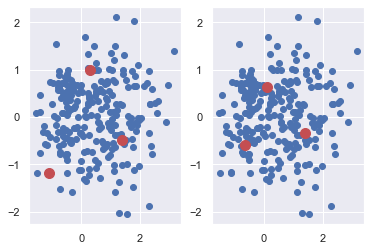

In [16]:
# visualize these first two steps
plt.subplot(121)
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

plt.subplot(122)
plt.scatter(points[:, 0], points[:, 1])
closest = closest_centroid(points, centroids)
centroids = move_centroids(points, closest, centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

### Exercise 4: Find at least 3 examples k-mean doesn’t work
- In cases of high dimensional data neither K-means, nor MAP-DP are
likely to be appropriate clustering choices. Methods have been proposed that
specifically handle such problems, such as a family of Gaussian mixture models that can efficiently handle
high dimensional data. Since MAP-DP is derived
from the nonparametric mixture model, by incorporating subspace methods into
the MAP-DP mechanism, an efficient high-dimensional clustering approach can
be derived using MAP-DP as a building block. We leave the detailed exposition
of such extensions to MAP-DP for future work.
- The data cannot be described by an exponential family distribution. Clustering such data would involve
some additional approximations and steps to extend
the MAP approach. Fortunately, the exponential family is a rather rich set of
distributions and is often flexible enough to achieve reasonable performance even
where the data cannot be exactly described by an exponential family distribution.